In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv("creditcard.csv")

In [9]:
# Print a summary of the dataset
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df.head()
##Target is the Class Feature##

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check the Distribution of the Target Class

In [14]:
anomalous_Class= df[df['Class'] == 1]
print(anomalous_Class.shape)                    

(492, 31)


In [18]:
Non_anomalous_Class= df[df['Class'] == 0]
print(Non_anomalous_Class.shape)

(284315, 31)


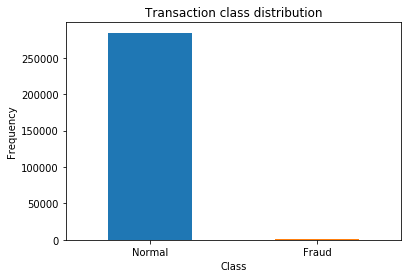

In [26]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# Handle Missing Values

In [7]:
# Check if any of the rows obatined is NULL
df.isnull().any().any(), df.shape

# The below result shows there are no missing values

(False, (284807, 31))

In [8]:
# Get the list of all the features
features=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Time','Amount']

# Calculate Pearson COrrelation Coefficient

In [9]:
# check how the features are correlated with the final class

for f in features:
    related = df['Class'].corr(df[f])
    print("%s: %f" % (f,related))
    
# Below results indicates not a very strong correlation between all the features    


Time: -0.012323
V1: -0.101347
V2: 0.091289
V3: -0.192961
V4: 0.133447
V5: -0.094974
V6: -0.043643
V7: -0.187257
V8: 0.019875
V9: -0.097733
V10: -0.216883
V11: 0.154876
V12: -0.260593
V13: -0.004570
V14: -0.302544
V15: -0.004223
V16: -0.196539
V17: -0.326481
V18: -0.111485
V19: 0.034783
V20: 0.020090
V21: 0.040413
V22: 0.000805
V23: -0.002685
V24: -0.007221
V25: 0.003308
V26: 0.004455
V27: 0.017580
V28: 0.009536
Time: -0.012323
Amount: 0.005632


In [10]:
correlations = [ df['Class'].corr(df[f]) for f in features]

In [11]:
## Next Plot the feature correlation of each of the feature with target (Class)


In [12]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)
    plt.title("Correlation Between Features Vs Target (Class)")

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75);
    plt.show()

In [13]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': features, 'correlation': correlations}) 

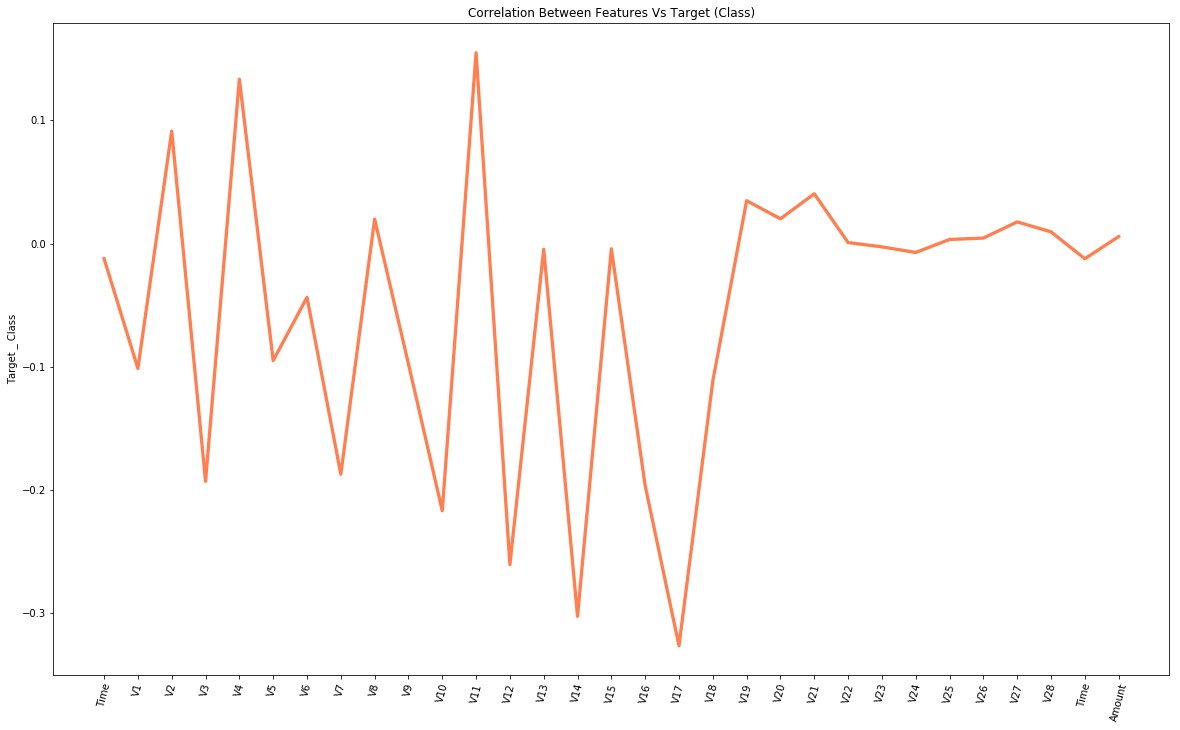

In [14]:
plot_dataframe(df2, 'Target _ Class')

The above figure shows not a very strong correlation between features and the target class.

# Plot the Distribution for each of the feature

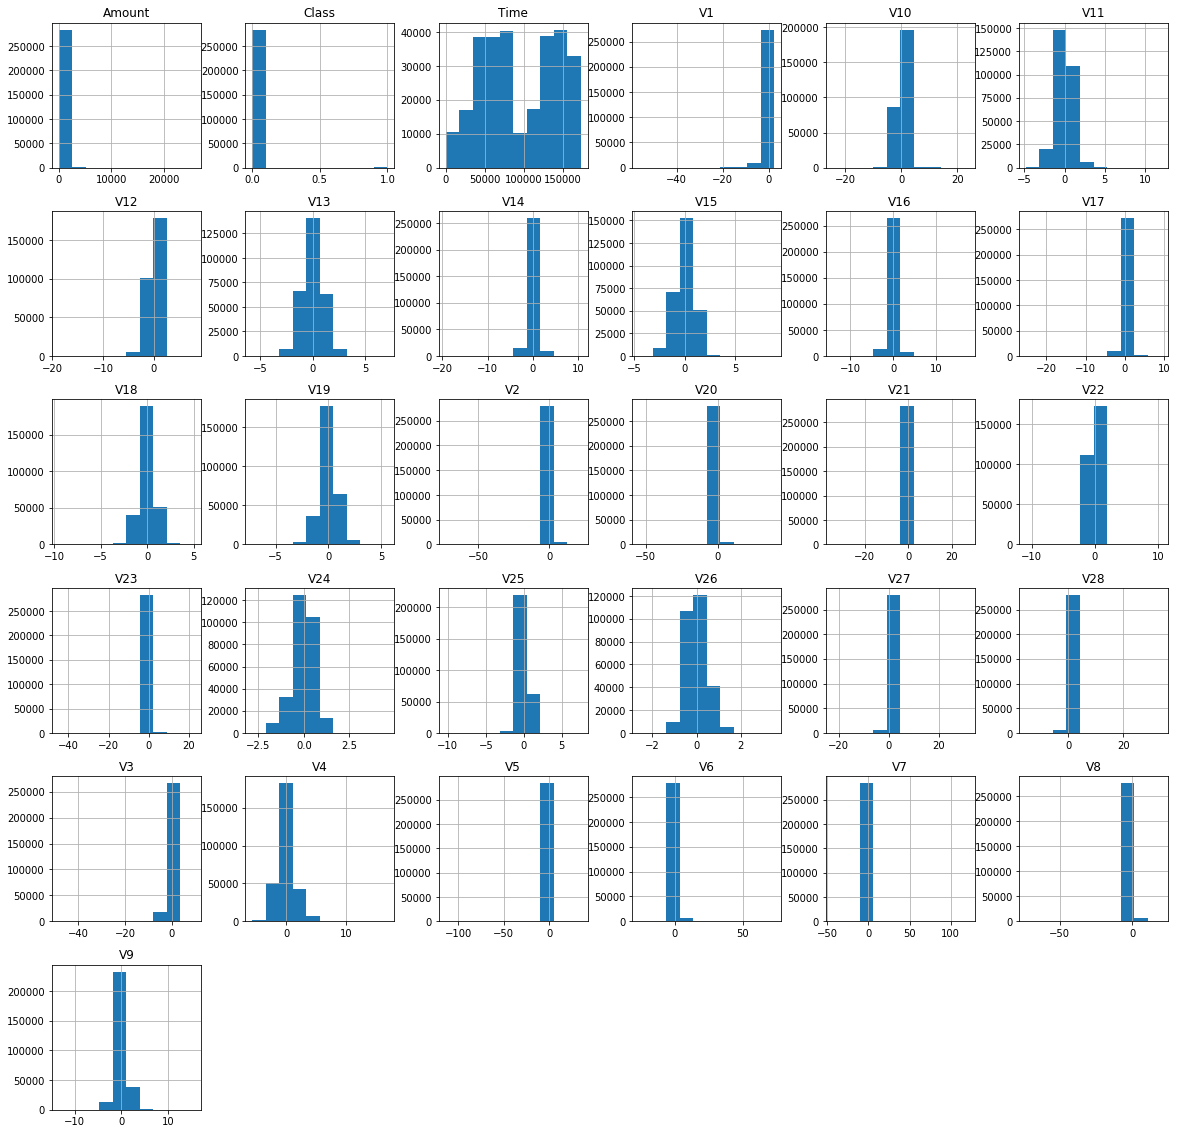

In [17]:
import matplotlib.pyplot as plt
import pandas
'''
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
'''
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()


# From the below plot it can be seen that most of the features are gaussian distributed  # except the time feature